In [320]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [321]:
def getE(model, n, J):
    sumFirst = 0;
    for i in range(n):
        for j in range(n):            
            s1 = model[i+1, j] if i+1 < n else model[0, j];
            s2 = model[i-1, j] if i-1 > -1 else model[n-1, j];
            s3 = model[i, j+1] if j+1 < n else model[i, 0];
            s4 = model[i, j-1] if j-1 > -1 else model[i, n-1];
            sumFirst += (s1 + s2 + s3 + s4) * model[i,j];
    return - J * sumFirst;

def getM(model, n):
    sumFirst = 0;  
    for i in range(n):
        for j in range(n):
            sumFirst += model[i, j];   
    return sumFirst;

In [322]:
def step(model, n, J, beta):
    global k;
    oldE = getE(model, n, J);
    
    index = np.random.randint(0, n, size=2);
    model[index[0], index[1]] *= -1;

    newE = getE(model, n, J);

    deltaE = newE - oldE;

    if deltaE < 0:
        return model;

    chance = np.math.exp(-deltaE * beta);
    r = np.random.random();

    if r < chance:
        return model;  
    
    model[index[0], index[1]] *= -1;
    return model;

In [323]:
n = 8;
model = 0;
count = 10000;
beta = 2;
J = -1;
modelArray = [];

steps = np.arange(0, count);
EArray = [];
EMeanArray = [];
MArray = [];
MMeanArray = [];

meanConts = 500;


def main():
    global modelArray, model, EArray, MArray, EMeanArray, MMeanArray;

    modelArray = [];
    EArray = [];
    EMeanArray = [];
    MArray = [];
    MMeanArray = [];

    model = np.full((n, n), 1);
    for i in range(n):
        for j in range(n):
            r = np.random.random();
            if r < 0.5:
                model[i, j] = -1;
            else:
                model[i, j] = 1;

    for i in steps:
        model = step(model.copy(), n, J, beta);
        EArray.append(getE(model, n, J));
        MArray.append(getM(model, n));
        modelArray.append(model);

        if i > meanConts:
            EMeanArray.append(np.array(EArray[i - meanConts : i]).mean());
            MMeanArray.append(np.array(MArray[i - meanConts : i]).mean());




    modelArray = np.array(modelArray);
    EArray = np.array(EArray);
    MArray = np.array(MArray);
    EMeanArray = np.array(EMeanArray);
    MMeanArray = np.array(MMeanArray);
    model = modelArray[-1];
    return;

main();

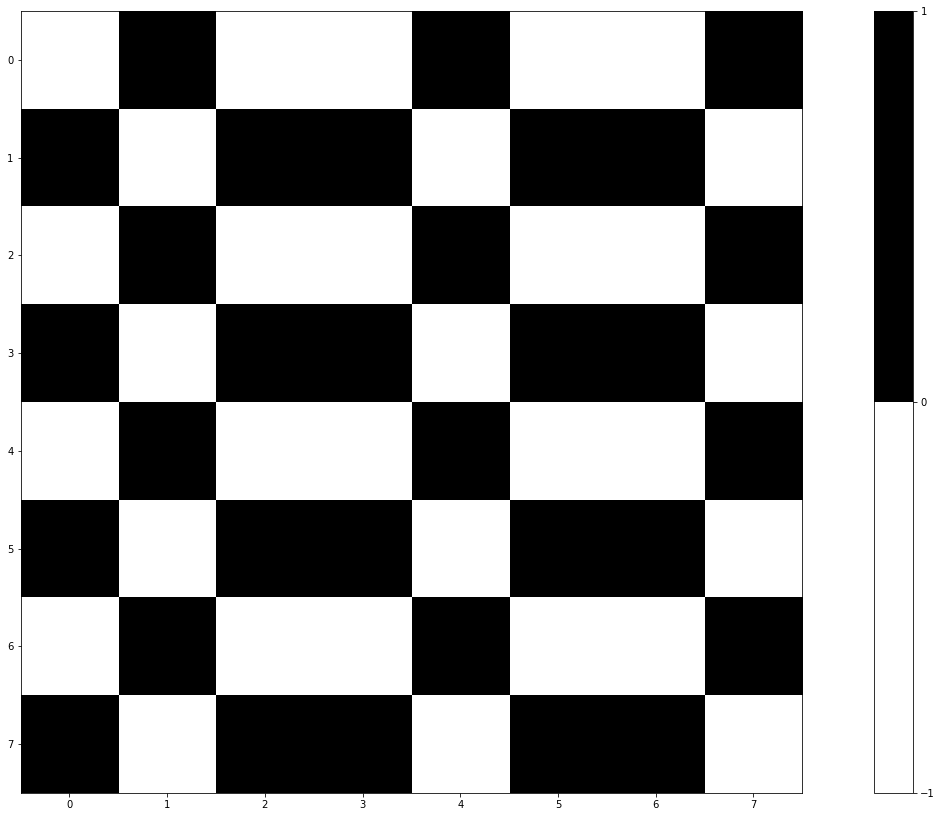

In [324]:
imageData = np.zeros((n, n));
for i in range(n):
    for j in range(n):
        imageData[i, j] = model[i, j];
plt.figure(figsize=(16,16));

cmap = colors.ListedColormap(['white', 'black'])
bounds=[-1, 0, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)


img = plt.imshow(imageData, cmap=cmap, norm=norm);
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=1)
plt.colorbar(img, boundaries=bounds, ticks=[-1, 0, 1], cax=cax)
plt.show();

<E> = -189.424, <M> = 0.0382


J = -1, Beta = 2




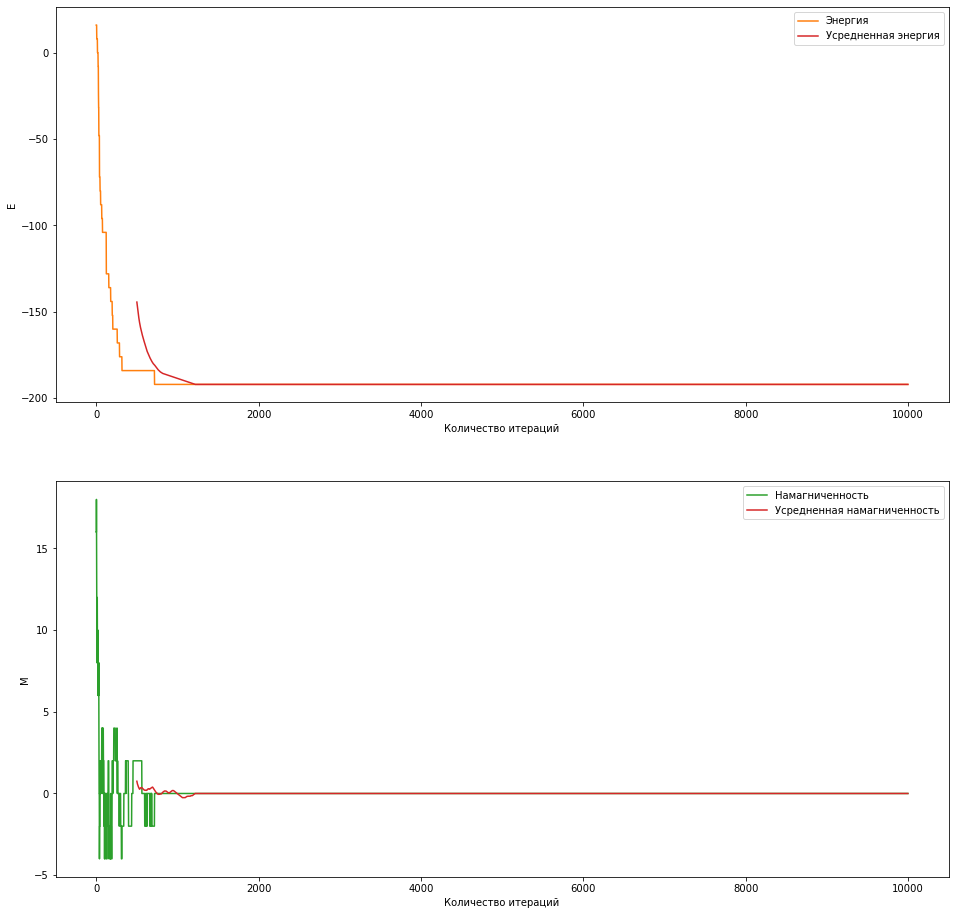

In [325]:
print("<E> = {}, <M> = {}\n\n".format(np.mean(EArray), np.mean(MArray)));
print("J = {}, Beta = {}\n\n".format(J, beta));

fig, axs = plt.subplots(2, figsize=(16,16));

axs[0].plot(steps, EArray, 'tab:orange');
axs[0].plot(np.arange(meanConts, EMeanArray.size + meanConts), EMeanArray, 'tab:red');
axs[0].legend(['Энергия','Усредненная энергия'], loc=1);
axs[0].set(xlabel='Количество итераций', ylabel='E');

axs[1].plot(steps, MArray, 'tab:green')
axs[1].plot(np.arange(meanConts, EMeanArray.size + meanConts), MMeanArray, 'tab:red')
axs[1].legend(['Намагниченность','Усредненная намагниченность'], loc=1);
axs[1].set(xlabel='Количество итераций', ylabel='M');
plt.show();

In [328]:
import xlwt

file = xlwt.Workbook(encoding="utf-8");
beta = 4;
jArray = np.array([0.1, 4, -0.1, -4]);

for j in jArray:
    J = j;
    main();
    one = file.add_sheet("Matrix_" + str(j));
    for i in range(n):
        for k in range(n):
            one.write(i, k, int(model[i, k]));

    two = file.add_sheet("info_" + str(j));

    two.write(0, 0, "<E>");
    two.write(0, 1, np.mean(EArray));
    two.write(1, 0, "<M>");
    two.write(1, 1, np.mean(MArray));
    two.write(2, 0, "J");
    two.write(2, 1, J);
    two.write(3, 0, "Beta");
    two.write(3, 1, beta);

    two.write(4, 0, "Iter");
    two.write(4, 1, "E");
    two.write(4, 2, "M");
    two.write(4, 3, "Emean");
    two.write(4, 4, "Mmean");

    for i in range(EArray.size):
        two.write(i + 5, 0, int(steps[i]));
        two.write(i + 5, 1, int(EArray[i]));
        two.write(i + 5, 2, int(MArray[i]));
        if i > meanConts:
            two.write(i + 5, 3, int(EMeanArray[i - meanConts - 1]));
            two.write(i + 5, 4, int(MMeanArray[i - meanConts - 1]));
        
file.save("GenFiles/10/1.xls");